<table align="center" width="100%">
    <tr>
        <td width="15%"></td>
        <td>
            <div align="center">
                <font color="###c5a4de" size="6">
                    <b>Student Percentage Prediction</b>
                </font>
            </div>
        </td>
    </tr>
</table>
          

## Problem Statement
Predict the percentage of an student based on the no. of study hours

## Data Defination
**Hours** :  The number of hours a student spends studying(Float)

**Scores:**  The percentage score achieved by the student


## Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Read Data](#Read_Data)**
3. **[Data Analysis and Preparation](#data_preparation)**
    - 3.1 - [Understand the Data](#Data_Understanding)
        - 3.1.1 - [Data Dimension](#Data_Shape)
        - 3.1.2 - [Data Types](#Data_Types)
        - 3.1.3 - [Summary Statistics](#Summary_Statistics)
        - 3.1.4 - [Missing Values](#Missing_Values)
        - 3.1.5 - [Visualization](#Assumption)
4. **[Model Building](#Training)**
   - 4.1 - [Split the data into training and test sets](#training)
   - 4.2 - [Build a model](#training)
   - 4.3 - [Creating an object](#training)
   - 4.4 - [Training](#training)
   - 4.5 - [Predict the values using test set](#testing)
   - 4.6 - [Actual vs Prdicted](#testing)
   - 4.7 - [Plot Actual vs Predicted](#testing)
   - 4.8 - [Result](#testing)
    

<a id='import_lib'></a>
## 1. Import Libraries

In [12]:
# 'Pandas' is used for data manipulation and analysis
import pandas as pd

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

<a id='Read Data'></a>
## 2. Read Data

In [14]:
# URL of the CSV file
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

# read csv file using pandas
df = pd.read_csv(url)

# display the top 5 rows of the dataframe
print(df.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30













<a id='data_preparation'></a>
## 3. Data Analysis and Preparation

<table align="left">
    <tr>
        <td width="8%">
        </td>
        <td>
            <div align="left", style="font-size:100%">
                <font color="#21618C">
                    <b>Data preparation is the process of cleaning and transforming raw data prior to building predictive models. <br><br>
                        Here we will analyze and prepare data to perform regression analysis:<br>
                         >>

<a id='Data_Understanding'></a>
### 3.1 Understand the Dataset

<a id='Data_Shape'></a>
### 3.1.1 Data Dimension

In [15]:
df.shape

(25, 2)

We see the dataframe has 2 columns and 25 observations

<a id='Data_Types'></a>
### 3.1.2 Data Types

In [16]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

data types are  as per the data definition. We can proceed with the analysis.

<a id='Summary_Statistics'></a>
### 3.1.3 Summary Statistics

In [17]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


"The above output illustrates the summary statistics of all the numeric variables like the mean, median(50%), minimum, and maximum values, along with the standard deviation"

<a id='Missing_Values'></a>
### 3.1.4 Missing Values

In [18]:
Total = df.isnull().sum()
Total

Hours     0
Scores    0
dtype: int64

 We obtain the dataset with no missing values

<a id='Visualization'></a>
### 3.1.5. Visualization

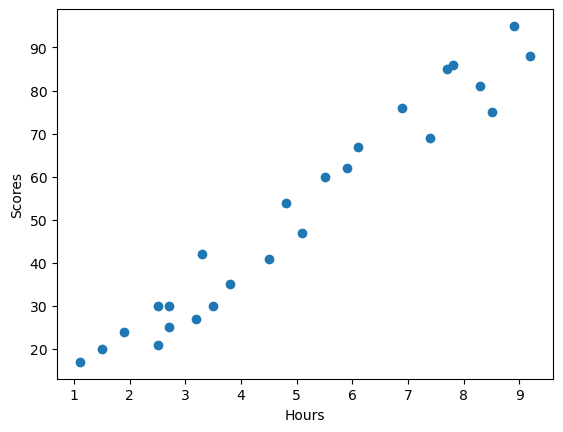

In [19]:
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

"The scatter plot illustrates a linear relationship between the number of hours studied and the scores achieved, indicating that as study time increases, the scores rise proportionally."

<a id='Model Building'></a>
## 4. Model Building


**4.1. Split the data into training and test sets**

In [20]:
#Split the data into features (X) and target (y)
X = df[['Hours']]  # Independent variable(s)
Y = df['Scores']   # Dependent variable



In [21]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# check the dimensions of the train & test subset for

# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (20, 1)
The shape of X_test is: (5, 1)
The shape of y_train is: (20,)
The shape of y_test is: (5,)


**4.2. Build model**

In [22]:
from sklearn.linear_model import LinearRegression

**4.3. Creating an object**

In [23]:
Lr=LinearRegression()

**4.4 Training**

In [24]:
Lr.fit(X_train,y_train)

LinearRegression()

**4.5. Predict the values using test set**

In [25]:
print(X_test)
y_pred=Lr.predict(X_test)

    Hours
14    1.1
13    3.3
17    1.9
3     8.5
21    4.8


**4.6. Comparing actual values to the predicted result**

In [26]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [27]:
df2=pd.DataFrame({'Scores':y_test,'Predicted':y_pred})
df2

,Scores,Predicted
14,17,9.970262
13,42,32.984700
17,24,18.339148
3,75,87.382463
21,54,48.676362


In [28]:
# Merge df2 with df on the "Actual" column
merged_df = pd.merge(df, df2, on='Scores')

# Print the resulting DataFrame
print(merged_df)

   Hours  Scores  Predicted
0    8.5      75  87.382463
1    3.3      42  32.984700
2    1.1      17   9.970262
3    1.9      24  18.339148
4    4.8      54  48.676362


This code merges two DataFrames, df and df2, based on the common column 'Scores'. The resulting DataFrame merged_df will contain all rows where the values in the 'Scores' column match between the two DataFrames. The merged DataFrame is then printed, displaying the combined data.

In [29]:
# Set "Hours" column as the index
merged_df.set_index('Hours', inplace=True)

**4.7. Visualizing Actual vs predicted**

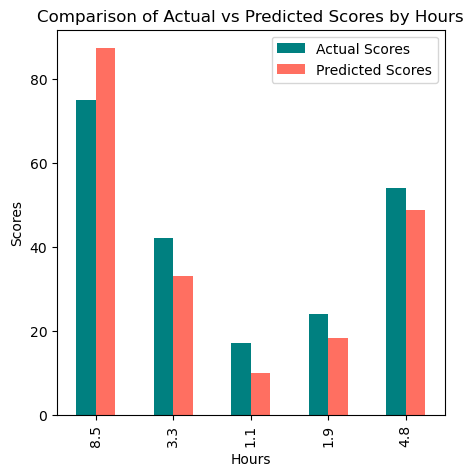

In [35]:
#plotting bargraph to depict the difference between actual and predicted value
merged_df.plot(kind='bar',figsize=(5,5),color=['#008080','#ff6f61'], )
plt.legend(['Actual Scores', 'Predicted Scores'])
plt.title('Comparison of Actual vs Predicted Scores by Hours')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

**7. Estimating training and test score**

In [37]:
print("Training_score:",Lr.score(X_train,y_train))
print("Test_score:",Lr.score(X_test,y_test))

Training_score: 0.9637848283990599
Test_score: 0.8421031525243527


**4.8. Result**

In [54]:
#9.25 hrs
hours=pd.DataFrame({"Hours":[9.25]})
predicted_score=Lr.predict(hours)


In [55]:
print(f"Student studying for {hours['Hours'][0]} Hrs will have the predicted score of :{predicted_score[0]}")

Student studying for 9.25 Hrs will have the predicted score of :95.22829438402952


### <span style="color:#00CED1">Result = Student studying for 9.25 Hrs will have the predicted score of :95.22829438402952</span>
